<a href="https://colab.research.google.com/github/hoangnuthuphuong/MACHINE-LEARNING-TEST/blob/main/THI%20GI%E1%BB%AEA%20K%E1%BB%B2/BREAST_CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Giới thiệu kho dữ liệu UCI**
Để xây dựng các mô hình phân lớp hữu hiệu, điều cần thiết là phải có bộ dữ liệu huấn luyện (dữ liệu đã được gán nhãn – do vậy các mô hình phân lớp còn được gọi là mô hình học có giám sát – supervised learning model). Những bộ dữ liệu huấn luyện tin cậy và hợp pháp (dữ liệu thu thập tuân thủ quy định của pháp luật.

**Ví dụ:** dữ liệu về lĩnh vực y học phải tuân thủ các quy định về y đức) thường có giá thành rất cao. Trường đại học [University of California](https://uci.edu/), Irvine cung cấp kho dữ liệu miễn phí cho các nghiên cứu học máy được biết đến dưới tên gọi [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). Hầu hết các nghiên cứu về Học Máy đều sử dụng các tập dữ liệu này để huấn luyện và đánh giá mô hình.

$$ ---$$



## **BREAST CANCER**

Tập dữ liệu [**Breast Cancer Wisconsin**](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) có tiêu đề là **Cơ sở dữ liệu về ung thư vú của Wisconsin** (ngày 8 tháng 1 năm 1991). Bộ dữ liệu chứa 699 mẫu bệnh phẩm được lấy từ các tế bào ung thư vú của bệnh nhân Có 11 thuộc tính cho mỗi quan sát tương ứng với miền giá trị của nó



> 1 Sample code number              (ID - Các con số dùng để định danh)

> 2 Clump Thickness                 (1-10) (Tức là giá trị của nó là số nguyên nằm từ 1 đến 10)

> 3 Uniformity of Cell Size         (1-10)

> 4 Uniformity of Cell Shape        (1-10)

> 5 Marginal Adhesion               (1-10)

> 6 Single Epithelial Cell Size     (1-10)

> 7 Bare Nuclei                     (1-10)

> 8 Bland Chromatin                 (1-10)

> 9 Normal Nucleoli                 (1-10)

> 10 Mitoses                        (1-10)

> 11 Class (2- cho bệnh lành tính và 4 - cho bệnh ác tính)

**Lưu ý:**
- Có 16 giá trị missing (giá trị bị thiếu) 

- Biến Class thể hiện chẩn đoán xem khối u lành tính (65,52% trường hợp), ác tính (34,48% trường hợp)


**Tập dữ liệu BREAST CANCER phục vụ cho bài toán phân lớp nhị phân**

##Tập thuộc tính Class đóng vai trò **nhãn lớp**, chẩn đoán xem khối u lành tính hay ác tính.

Nhưng vì tập thuộc tính này thể hiện qua các giá trị 2 (lành tính) và 4 (ác tính) nên ta cần biến đổi từng giá trị thành các đặc trưng nhị phân chỉ chứa giá trị 0 và 1.
> **0 : lành tính**

> **1 : ác tính**


Thuộc tính **ID** không cần thiết trong huấn luyện mô hình. Vì nó không được sử dụng để phân loại.

Thuộc tính **Class** cũng không cần thiết trong huấn luyện vì đóng vai trò là nhãn lớp

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# **ĐỌC VÀ XỬ LÍ DỮ LIỆU**

In [9]:
data = pd.read_csv('/content/breast-cancer-wisconsin.data', header=None, sep=',')
data.columns = ['ID','Clump_Thickness','Cell_Size','Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
data.head(10)

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


Kiểm tra thông tin và kích thước của tập dữ liệu 

In [10]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Cell_Size                    699 non-null    int64 
 3   Cell_Shape                   699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


(699, 11)

Qua **data.info()**=> tập dữ liệu không có giá trị missing hay null/NaN. Nhưng vì dữ liệu thu thập đều là dạng số nguyên nhưng theo bảng trên ta có thể nhận thấy cột **Bare_Nuclei** nhận Dtype là object nên chắc chắn trong tệp dữ liệu có những **giá trị nhập lỗi ở cột Bare_Nuclei**. 

> Kiểm tra lại tập dữ liệu ta thấy những giá trị lỗi là **"?"**

In [11]:
# Sử dụng hàm value_counts() để đếm số lượng các giá trị trong tập thuộc tính Bare_Nuclei
er = pd.DataFrame(data.Bare_Nuclei.value_counts())
er

,Bare_Nuclei
1,402
10,132
2,30
5,30
3,28
8,21
4,19
?,16
9,9
7,8


**=> CÓ 16 GIÁ TRỊ LỖI**

Chỉnh sửa lại tập dữ liệu để loại bỏ các giá trị lỗi

In [12]:
# Xóa các dòng có dữ liệu lỗi dạng "?"
ndata = data.drop(data[data.Bare_Nuclei == "?"].index)
# Ép kiểu thành integer
ndata.Bare_Nuclei = ndata.Bare_Nuclei.astype('int')
# Thông tin
ndata.info()
# Kích thước của sữ liệu sau khi xóa bỏ các trường hợp missing
ndata.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


(683, 11)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Biến nhãn lớp Class
y = ndata["Class"]         
# Biến dữ liệu sau khi xóa bỏ thuộc tính không cần thiết và thuộc tính nhãn lớp
X = ndata.drop(["ID","Class"], axis=1) 
# Mã hóa biễn nhãn lớp thành dạng 0,1 và chuẩn hóa y
y = LabelEncoder().fit_transform(y)

In [14]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [15]:
X

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


Số trường hợp ung thư lành tính:  444
Số trường hợp ung thư ác tính:  239


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Ung thư lành tính'), Text(0, 0, 'Ung thư ác tính')]

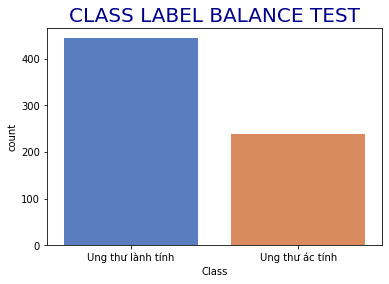

In [19]:
# Biểu đồ đếm số trường hợp Ác tính (M - malignant) và Lành tính (B - benign)
plt.title("CLASS LABEL BALANCE TEST", size=20, color="darkblue")
ax = sns.countplot(y, label="Count", palette="muted", x="diagnosis")
B, M = y.value_counts()
print('Số trường hợp ung thư lành tính: ', B)
print('Số trường hợp ung thư ác tính: ', M)
ax.set_xticklabels(["Ung thư lành tính", "Ung thư ác tính",])

**=> KẾT LUẬN:** NHÃN LỚP KHÔNG CÂN BẰNG

# **CHIA TRAIN-TEST**


Khi phân chia dữ liệu, trừ dữ liệu kiểu thời gian (có gắn với trục thời gian), ta nên dùng hàm **shuffle** và **random_state** để xáo trộn dữ liệu, nhằm đảm bảo tính ngẫu nhiên khi phân chia tập dữ liệu. Đặt trạng thái ngẫu nhiên cho phép thử nghiệm dễ dàng sao chép và đảm bảo kết quả trong cùng một tham số.

In [64]:
# Phân chia train - test theo tỉ lệ 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=9)

# Chuẩn hóa dữ liệu
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train 
y_test

print("X_train\n",X_train[:5])
print("\nX_test\n",X_test[:5])
print("\ny_train\n",y_train)
print("\ny_test\n",y_test)

X_train
 [[-0.51272372 -0.69344263 -0.73585692 -0.63314162 -0.99983995 -0.69298081
  -0.58343838 -0.60358898 -0.3431589 ]
 [ 0.55850262  0.60765591  0.27194712  0.42295408 -0.0967587   1.5229344
   1.45598132  1.71959035  0.8352358 ]
 [ 0.20142717  2.23402909  2.2875552   0.77498598  0.35478192  0.41497679
   0.2323295   0.39205931 -0.3431589 ]
 [-0.86979916 -0.69344263 -0.73585692 -0.63314162 -0.54829933 -0.69298081
  -0.17555444 -0.60358898 -0.3431589 ]
 [ 1.9868044  -0.04289336  0.94381648 -0.28110972 -0.0967587   0.41497679
   0.2323295   2.38335588  0.24603845]]

X_test
 [[-1.22687461 -0.69344263 -0.73585692 -0.63314162 -0.54829933 -0.69298081
  -0.99132232 -0.60358898  3.78122255]
 [ 1.9868044   0.28238128  0.27194712  1.12701787 -0.54829933  1.7999238
  -0.58343838  0.06017654 -0.3431589 ]
 [ 0.91557807  0.60765591  0.94381648  2.53514547  0.80632254  1.7999238
   1.45598132  2.05147312  1.42443315]
 [-0.86979916 -0.69344263 -0.73585692 -0.63314162 -0.54829933 -0.69298081
  -0.1

**Xác định số lượng k-fold được xác định tùy thuộc vào số lượng y_train**

In [65]:
unique, counts = np.unique(y_train, return_counts=True)
result = dict(zip(unique, counts))
print("Số lượng k-fold được xác định")
print(result)

Số lượng k-fold được xác định
{0: 360, 1: 186}


#**MÔ HÌNH Logistic Regression**
    

In [66]:
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')
lgt.fit(X_train, y_train)
y_pred = lgt.predict(X_test)
print('Kết quả huấn luyên 10-fold cv của mô hình LogisticRegression:')
scores = cross_val_score(lgt, X_train, y_train, cv=10,scoring='accuracy')
print(scores)

Kết quả huấn luyên 10-fold cv của mô hình LogisticRegression:
[0.96363636 1.         1.         0.96363636 0.94545455 0.98181818
 0.94444444 0.94444444 0.94444444 0.94444444]


**KẾT QUẢ CÁC CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG MÔ HÌNH LOGISTIC REGRESSION**


In [67]:
acc_score_l=round(accuracy_score(y_test, y_pred),3)
print("Accuracy: {}%".format(round(100*accuracy_score(y_test, y_pred),3)))

precision_sc_l=round(precision_score(y_test, y_pred, average='weighted'),5)
print("\nPrecision score: {}%".format(100*precision_sc_l))
print('Kết quả dự đoán precision_score:\n',precision_score(y_test, y_pred,average=None))

recall_cs_l=round(recall_score(y_test, y_pred, average='weighted'),3)
print("\nRecall score: {}%".format(100*recall_cs_l))
print('Kết quả dự đoán recall_score:\n',recall_score(y_test, y_pred,average=None))

f1_sc_l=round(f1_score(y_test, y_pred, average='weighted'),5)
print("\nF1 score: {}%".format(100*f1_sc_l))
print('Kết quả dự đoán f1_score:\n',f1_score(y_test, y_pred,average=None))


Accuracy: 98.54%

Precision score: 98.574%
Kết quả dự đoán precision_score:
 [0.97674419 1.        ]

Recall score: 98.5%
Kết quả dự đoán recall_score:
 [1.         0.96226415]

F1 score: 98.535%
Kết quả dự đoán f1_score:
 [0.98823529 0.98076923]


Confusion matrix:
Confusion matrix, without normalization
[[84  0]
 [ 2 51]]


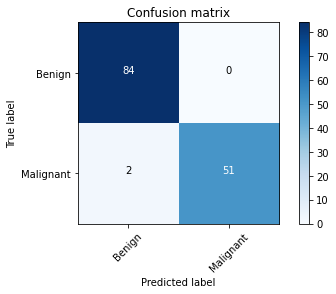

In [68]:
# Model Evaluation Metrics
print("Confusion matrix:")
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion, classes=['Benign', 'Malignant'], title='Confusion matrix')

In [69]:
# Evaluate the model
print("Logistic Regression")    
print("----------------------------------")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Logistic Regression
----------------------------------

Accuracy: 0.9854014598540146

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.96      0.98        53

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



**Cách đọc bảng report:**
> Ví dụ chỉ nhìn vào kết quả **precision** của nhãn 0 - lành tính ta thấy độ chính xác là 0.98, có nghĩa là chúng tôi đã tìm thấy chính xác 98% các trường hợp lành tính.

> Cột **support** cho chúng tôi biết có bao nhiêu điểm dữ liệu để hỗ trợ các chỉ số. Vậy, có 84 trường hợp lành tính và 52 trường hợp ác tính trong bộ đào tạo của trên.

#**MÔ HÌNH NAIVE BAYES**


In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_score = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Kết quả huấn luyên 10-fold cv của mô hình Naive Bayes:')
print(gnb_score)

Kết quả huấn luyên 10-fold cv của mô hình Naive Bayes:
[0.94545455 1.         1.         0.94545455 0.96363636 0.96363636
 0.92592593 0.92592593 0.94444444 0.92592593]


**KẾT QUẢ CÁC CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG MÔ HÌNH NAIVE BAYES**


In [71]:
acc_score_n=round(accuracy_score(y_test, y_pred),3)
print("Accuracy: {}%".format(round(100*accuracy_score(y_test, y_pred),3)))

precision_sc_n=round(precision_score(y_test, y_pred, average='weighted'),5)
print("\nPrecision score: {}%".format(100*precision_sc_n))
print('Kết quả dự đoán precision_score:\n',precision_score(y_test, y_pred,average=None))

recall_cs_n=round(recall_score(y_test, y_pred, average='weighted'),3)
print("\nRecall score: {}%".format(100*recall_cs_n))
print('Kết quả dự đoán recall_score:\n',recall_score(y_test, y_pred,average=None))

f1_sc_n=round(f1_score(y_test, y_pred, average='weighted'),5)
print("\nF1 score: {}%".format(100*f1_sc_n))
print('Kết quả dự đoán f1_score:\n',f1_score(y_test, y_pred,average=None))


Accuracy: 99.27%

Precision score: 99.28399999999999%
Kết quả dự đoán precision_score:
 [1.         0.98148148]

Recall score: 99.3%
Kết quả dự đoán recall_score:
 [0.98809524 1.        ]

F1 score: 99.271%
Kết quả dự đoán f1_score:
 [0.99401198 0.99065421]


Confusion matrix:
Confusion matrix, without normalization
[[83  1]
 [ 0 53]]


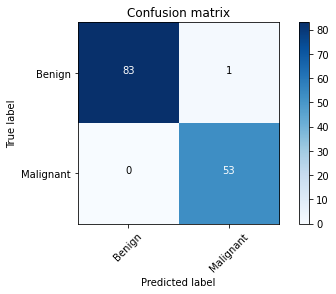

In [72]:
print("Confusion matrix:")
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion, classes=['Benign', 'Malignant'], title='Confusion matrix')

In [73]:
# Evaluate the model
print("Naive Bayes")    
print("----------------------------------")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

Naive Bayes
----------------------------------

Accuracy: 0.9927007299270073

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        84
           1       0.98      1.00      0.99        53

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137



#**MÔ HÌNH k-NN**

In [74]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'uniform')
knn_score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Kết quả huấn luyên 10-fold cv của mô hình k-NN:')
print(knn_score)

Kết quả huấn luyên 10-fold cv của mô hình k-NN:
[0.96363636 0.96363636 0.98181818 0.92727273 0.94545455 1.
 0.94444444 0.96296296 0.94444444 0.92592593]


**KẾT QUẢ CÁC CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG MÔ HÌNH K-NN**


In [75]:
acc_score_k=round(accuracy_score(y_test, y_pred),3)
print("Accuracy: {}%".format(round(100*accuracy_score(y_test, y_pred),3)))

precision_sc_k=round(precision_score(y_test, y_pred, average='weighted'),5)
print("\nPrecision score: {}%".format(100*precision_sc_k))
print('Kết quả dự đoán precision_score:\n',precision_score(y_test, y_pred,average=None))

recall_cs_k=round(recall_score(y_test, y_pred, average='weighted'),3)
print("\nRecall score: {}%".format(100*recall_cs_k))
print('Kết quả dự đoán recall_score:\n',recall_score(y_test, y_pred,average=None))

f1_sc_k=round(f1_score(y_test, y_pred, average='weighted'),5)
print("\nF1 score: {}%".format(100*f1_sc_k))
print('Kết quả dự đoán f1_score:\n',f1_score(y_test, y_pred,average=None))


Accuracy: 97.81%

Precision score: 97.886%
Kết quả dự đoán precision_score:
 [0.96551724 1.        ]

Recall score: 97.8%
Kết quả dự đoán recall_score:
 [1.         0.94339623]

F1 score: 97.798%
Kết quả dự đoán f1_score:
 [0.98245614 0.97087379]


Confusion matrix:
Confusion matrix, without normalization
[[84  0]
 [ 3 50]]


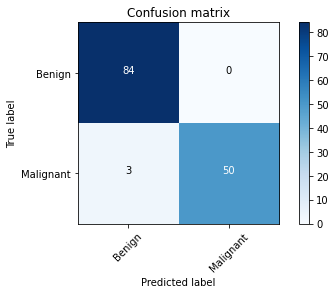

In [76]:
print("Confusion matrix:")
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion, classes=['Benign', 'Malignant'], title='Confusion matrix')

In [77]:
# Evaluate the model
print("MÔ HÌNH K LÂN CẬN")    
print("----------------------------------")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

MÔ HÌNH K LÂN CẬN
----------------------------------

Accuracy: 0.9781021897810219

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.94      0.97        53

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137



# **KẾT QUẢ SO SÁNH CÁC MÔ HÌNH**

In [78]:
logistic_rr_model = [acc_score_l, precision_sc_l, recall_cs_l, f1_sc_l]
knn_model = [acc_score_k, precision_sc_k, recall_cs_k, f1_sc_k]
naiveb_model = [acc_score_n, precision_sc_n, recall_cs_n, f1_sc_n]
data = {'Logistic Regression model':logistic_rr_model, 'k-NN model': knn_model, 'Naive Bayes model': naiveb_model}
name = ['Accuracy', 'Precision', 'Recall', 'f1-measure ']
table = pd.DataFrame(data=data, index = name)
table

,Logistic Regression model,k-NN model,Naive Bayes model
Accuracy,0.98500,0.97800,0.99300
Precision,0.98574,0.97886,0.99284
Recall,0.98500,0.97800,0.99300
f1-measure,0.98535,0.97798,0.99271


Nhìn vào kết quả của bảng trên, ta có thể dễ dàng kết luận mô hình Naive Bayes vượt trội hơn so với mô hình Logistic Regression và k lân cận.

> Thứ tự vượt trội của các mô hình:

**$$Naive Bayes > Logistic Regression > k-NN$$**